In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios

def make_pipeline():
    testing_factor1 = operation_ratios.operation_margin.latest
    testing_factor2 = operation_ratios.revenue_growth.latest
    testing_factor3 = sentiment.sentiment_signal.latest
    
    universe = (Q1500US() & testing_factor1.notnull()
                & testing_factor2.notnull()
                & testing_factor3.notnull())
    
    testing_factor1 = testing_factor1.rank(mask = universe, method = 'average')
    testing_factor2 = testing_factor2.rank(mask = universe, method = 'average')
    testing_factor3 = testing_factor3.rank(mask = universe, method = 'average')
    
    testing_factor = testing_factor1 + testing_factor2 + testing_factor3

    testing_quantiles = testing_factor.quantiles(2)
    
    pipe = Pipeline(columns = {'testing_factor' : testing_factor,
                              'shorts' : testing_quantiles.eq(0),
                              'longs' : testing_quantiles.eq(1)},                
                    screen = universe)
    
    return pipe

result = run_pipeline(make_pipeline(), start_date = '2015-01-01', end_date = '2016-01-01')
result.head()

longs shorts  testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [HWM])     True  False           782.0
                          Equity(24 [AAPL])   True  False          1171.0
                          Equity(62 [ABT])   False   True           774.5
                          Equity(67 [ADSK])   True  False           934.0
                          Equity(76 [TAP])   False   True           174.5

In [2]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date = '2014-12-01', end_date = '2016-02-01', fields = 'open_price')
len(assets)

9657

Dropped 4.7% entries from factor data: 4.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,47.0,797.5,540.979920,166.312105,61155,50.099536
2,744.0,1523.0,983.000205,147.989190,60912,49.900464


Returns Analysis


,3D,10D,30D
Ann. alpha,0.120,0.108,0.095
beta,-0.130,-0.165,-0.220
Mean Period Wise Return Top Quantile (bps),9.845,9.098,8.895
Mean Period Wise Return Bottom Quantile (bps),-9.798,-9.075,-8.930
Mean Period Wise Spread (bps),19.644,18.174,17.827


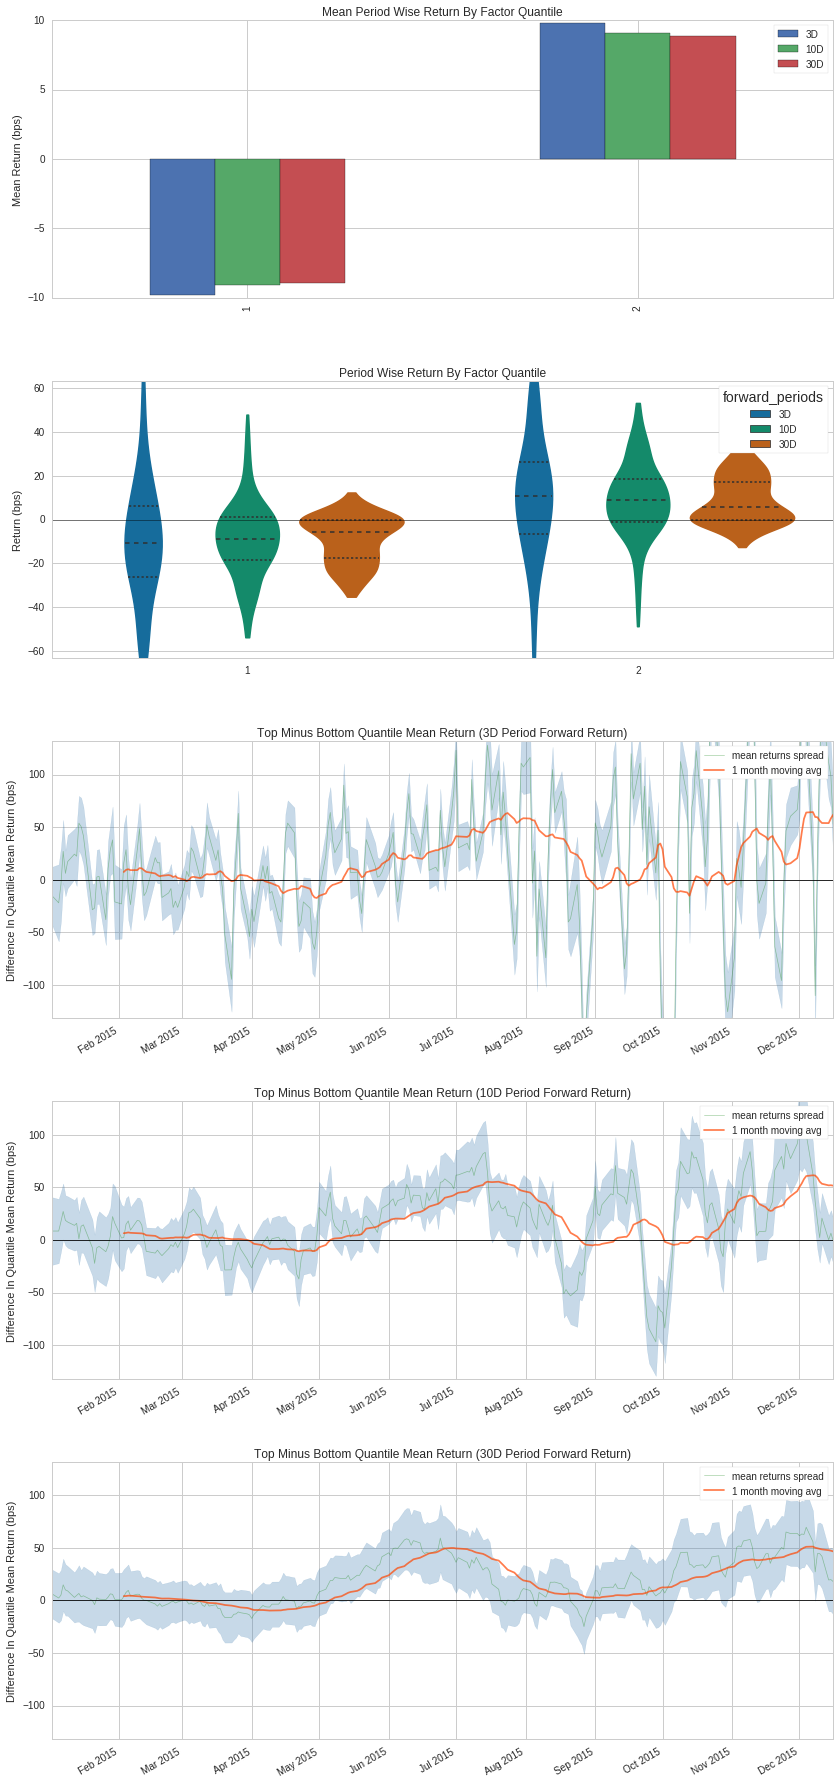

Information Analysis


,3D,10D,30D
IC Mean,0.045,0.070,0.102
IC Std.,0.138,0.127,0.127
Risk-Adjusted IC,0.329,0.553,0.804
t-stat(IC),5.116,8.607,12.515
p-value(IC),0.000,0.000,0.000
IC Skew,-0.201,-0.202,0.203
IC Kurtosis,-0.013,-0.390,-1.082


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


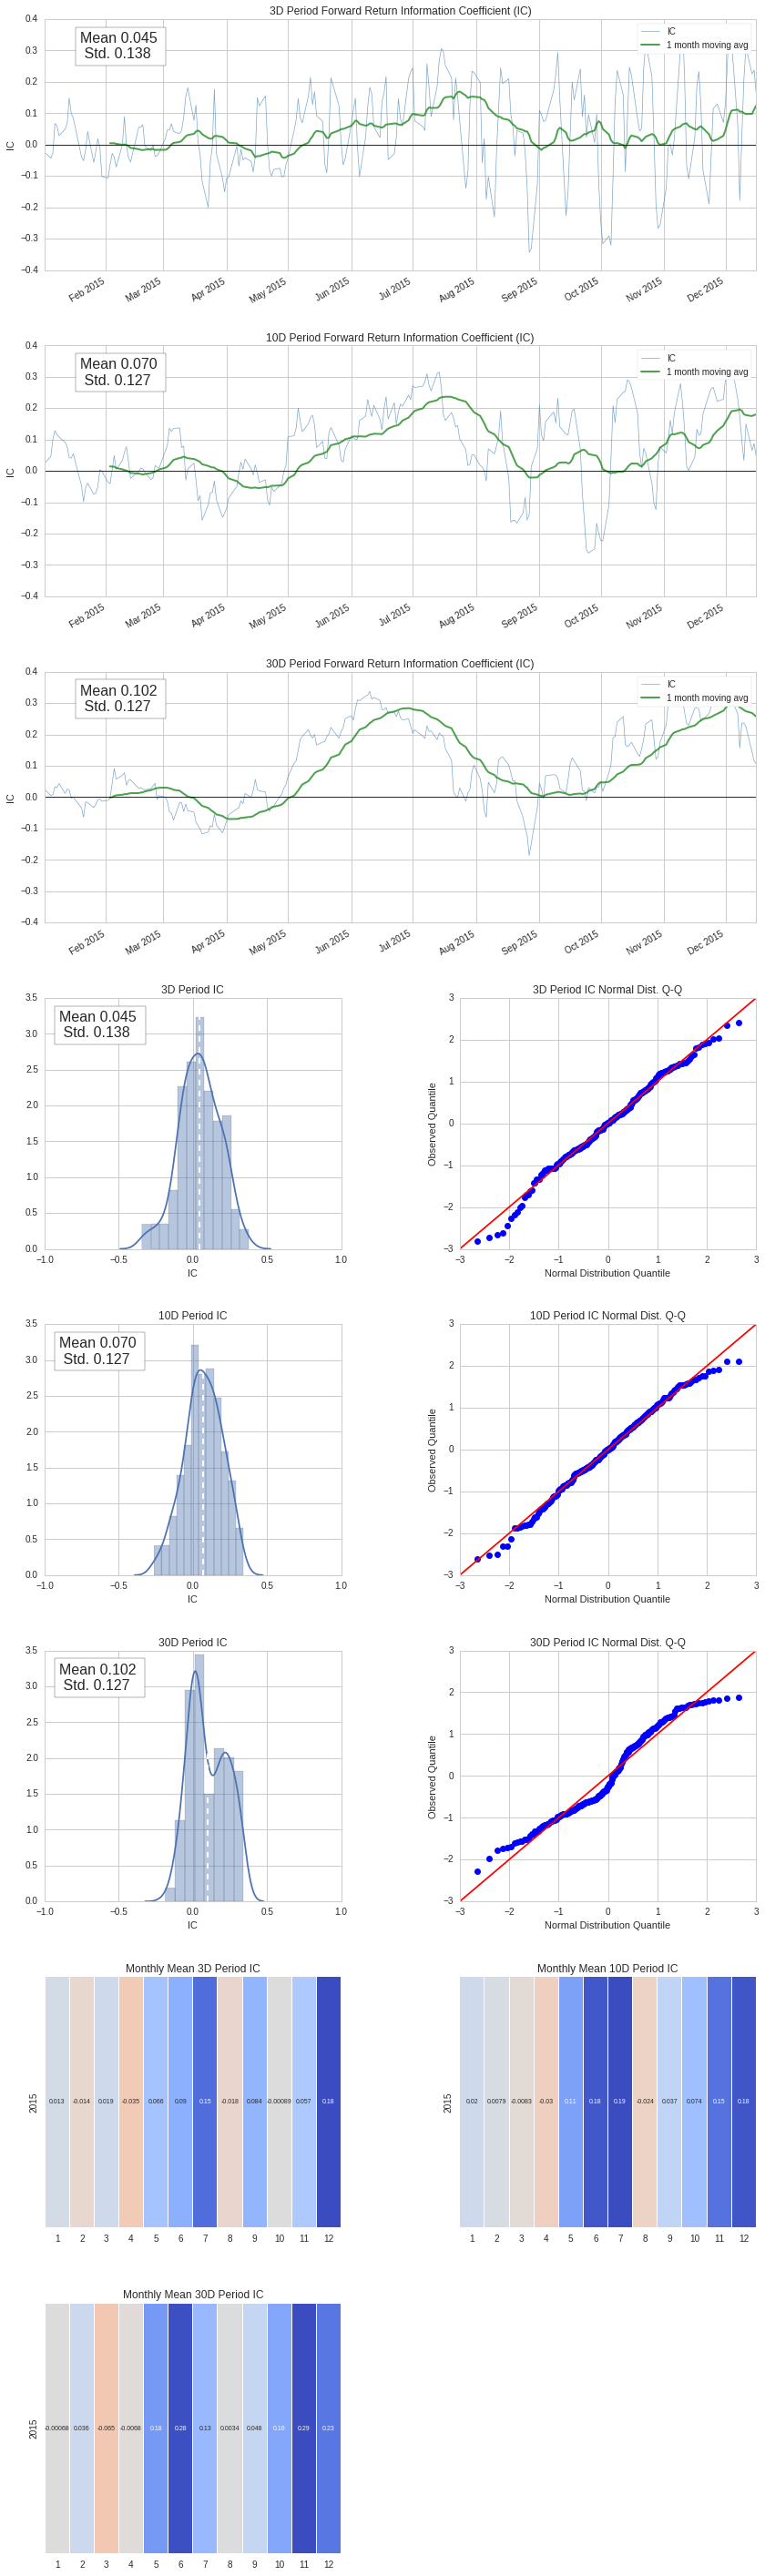

/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


Turnover Analysis


,3D,10D,30D
Quantile 1 Mean Turnover,0.068,0.126,0.203
Quantile 2 Mean Turnover,0.068,0.125,0.200


,3D,10D,30D
Mean Factor Rank Autocorrelation,0.932,0.861,0.732


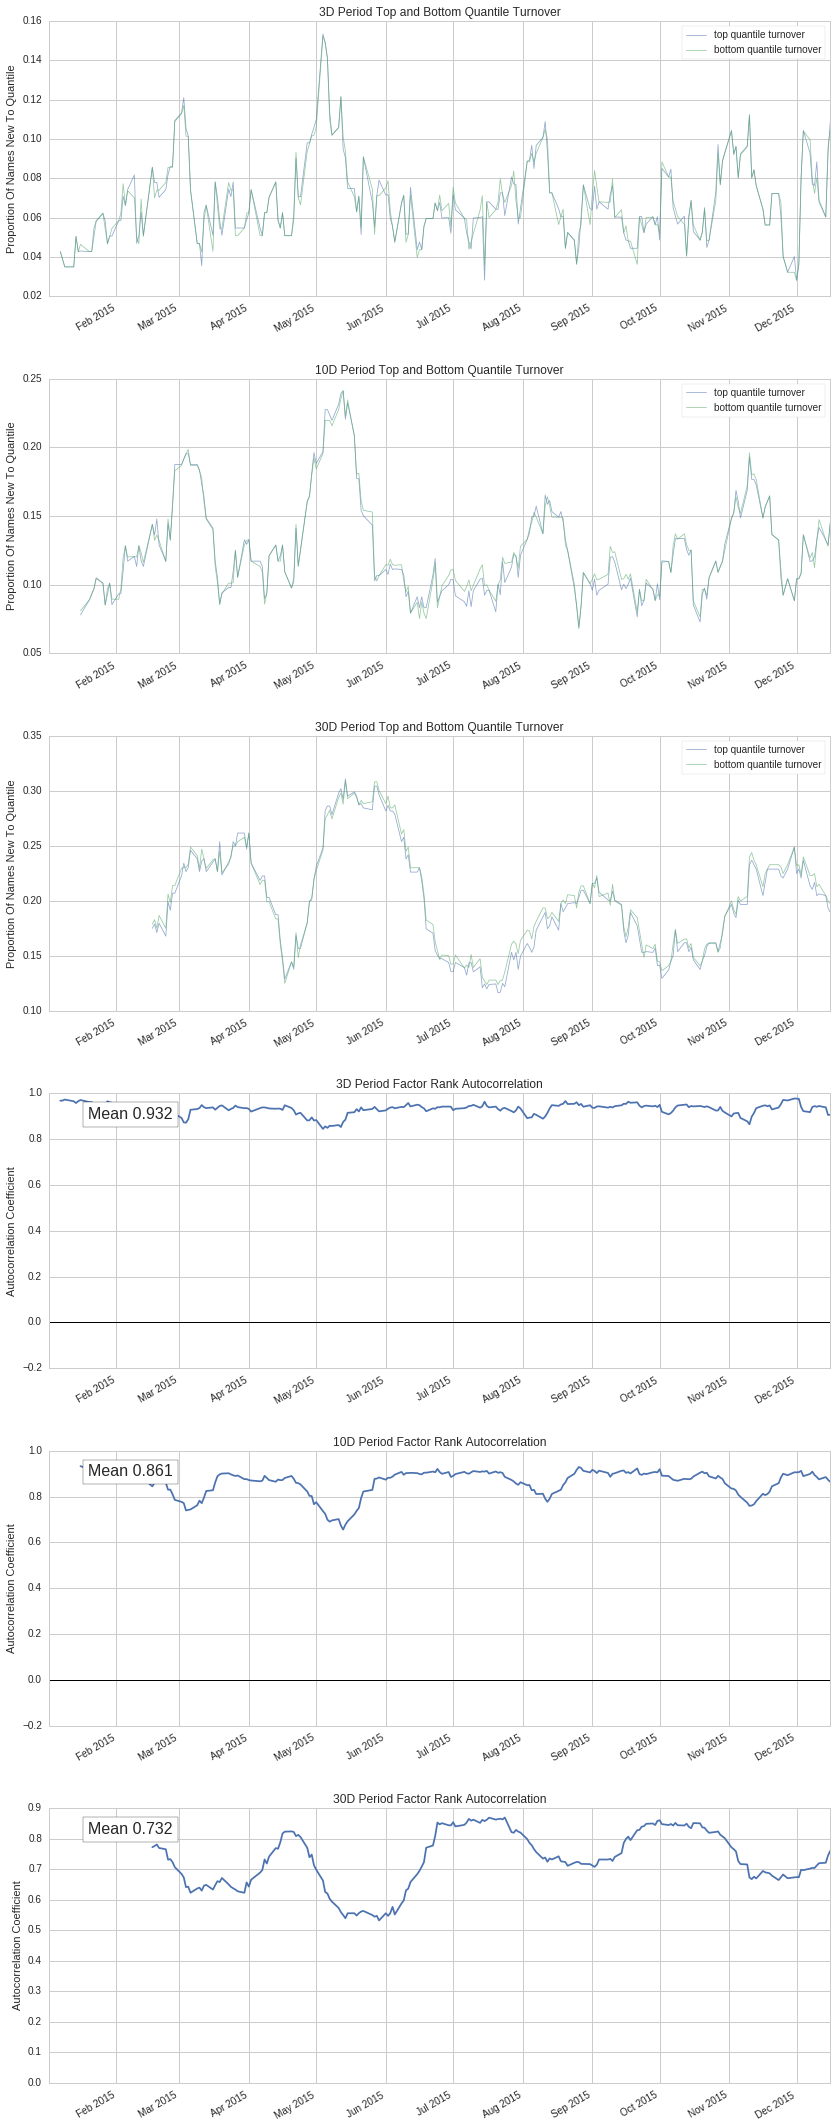

In [3]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['testing_factor'],
                                                                   prices = pricing,
                                                                   quantiles = 2,
                                                                   periods = (3,10,30))

alphalens.tears.create_full_tear_sheet(factor_data)

